In [97]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import tensorflow as tf

In [98]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data() # Data set alerady in x_train,y_train,x_valid & y_valid format

In [99]:
print(x_train.shape,y_train.shape) # dimension of x (prdictor) and y (outcome). We can see predictor has 2 tensors and y has 1 tensor

(60000, 28, 28) (60000,)


In [100]:
# Transform predictor to 1 tensor by reshaping to from 28x28 to 784
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)
print(x_train.shape,x_valid.shape)

(60000, 784) (10000, 784)


In [101]:
# normalize data
x_train = x_train / 255
x_valid = x_valid / 255 
# Create categorical outcome
num_categories = 10
y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [102]:
model = Sequential()

In [103]:
tf.random.set_seed(22)
model = keras.Sequential([
    Dense(units=512,input_shape=(784,)),
    Dense(units=512,activation='relu'),
    Dense(units=512,activation = 'relu'),
    Dense(units=256,activation ='relu'),
    Dense(units=10,activation = 'softmax')
])

c:\Users\gito_\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,061,130 (4.05 MB)

 Trainable params: 1,061,130 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

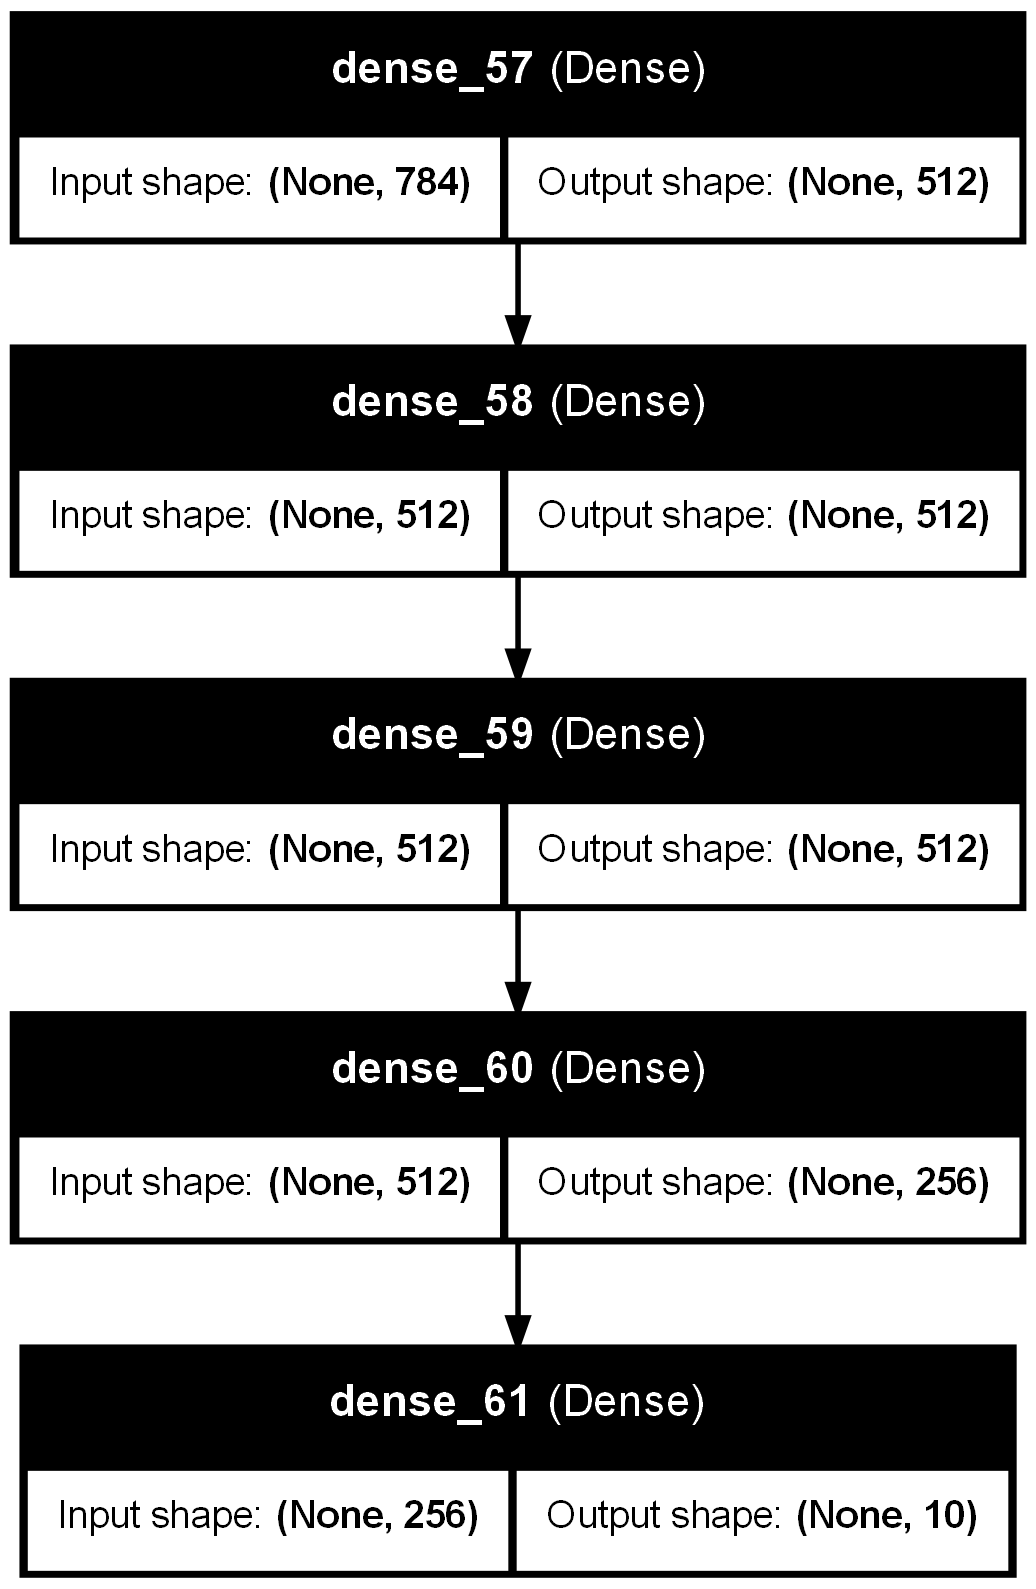

In [105]:
plot_model(model,to_file='D:/MSC/UHull/COURSE/WEEK09-ML-ANN-DL/model_plot.png', show_shapes=True, show_layer_names=True)

In [106]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy']) # compile model with cross entropy cost function with accuracy metrics

In [107]:
history = model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8744 - loss: 0.4018 - val_accuracy: 0.9586 - val_loss: 0.1542
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9549 - loss: 0.1768 - val_accuracy: 0.9645 - val_loss: 0.1499
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9605 - loss: 0.1670 - val_accuracy: 0.9689 - val_loss: 0.1358
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9652 - loss: 0.1566 - val_accuracy: 0.9687 - val_loss: 0.1853
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9680 - loss: 0.1500 - val_accuracy: 0.9636 - val_loss: 0.2447
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9700 - loss: 0.1443 - val_accuracy: 0.9723 - val_loss: 0.1892
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9710 - loss: 0.1477 - val_accuracy: 0.9585 - val_loss: 0.2474
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9708 - loss: 

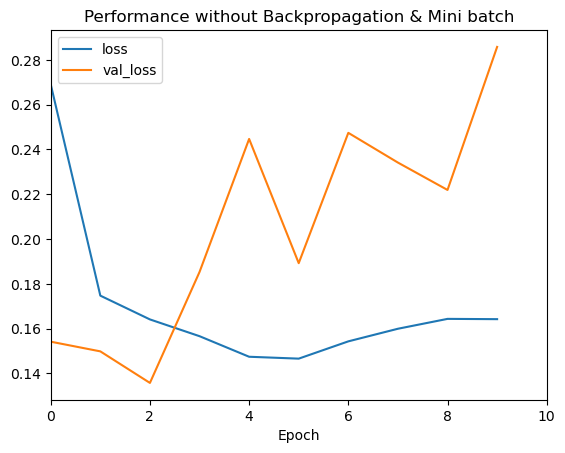

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(y=['loss','val_loss'],xlim=[0,10],xlabel='Epoch',title="Performance without Backpropagation & Mini batch")

plt.show()

In [116]:
tf.random.set_seed(22)
model = keras.Sequential([
    Dense(units=512,input_shape=(784,)),
    Dense(units=512,activation='relu'),
    Dense(units=512,activation = 'relu'),
    Dense(units=256,activation ='relu'),
    Dense(units=10,activation = 'softmax')
])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='sgd') # compile model adding optimized for backpropagation

c:\Users\gito_\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
history = model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7843 - loss: 0.8493 - val_accuracy: 0.9305 - val_loss: 0.2389
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9311 - loss: 0.2352 - val_accuracy: 0.9492 - val_loss: 0.1713
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9486 - loss: 0.1739 - val_accuracy: 0.9589 - val_loss: 0.1375
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9593 - loss: 0.1381 - val_accuracy: 0.9649 - val_loss: 0.1171
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9663 - loss: 0.1136 - val_accuracy: 0.9678 - val_loss: 0.1037
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9716 - loss: 0.0955 - val_accuracy: 0.9713 - val_loss: 0.0943
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9759 - loss: 0.0816 - val_accuracy: 0.9740 - val_loss: 0.0876
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9792 - loss:

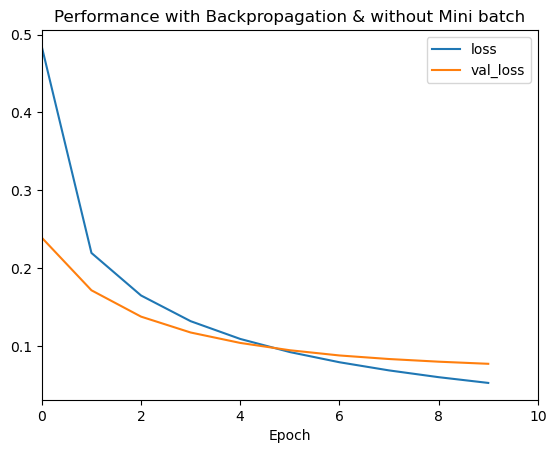

In [118]:
pd.DataFrame(history.history).plot(y=['loss','val_loss'],xlim=[0,10],xlabel='Epoch',title="Performance with Backpropagation & without Mini batch")
plt.show()

In [119]:
tf.random.set_seed(2)
model = keras.Sequential([
    Dense(units=512,input_shape=(784,)),
    Dense(units=512,activation='relu'),
    Dense(units=512,activation = 'relu'),
    Dense(units=256,activation ='relu'),
    Dense(units=10,activation = 'softmax')
])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='sgd')
history = model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid),batch_size = 100
)

c:\Users\gito_\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6568 - loss: 1.3508 - val_accuracy: 0.8979 - val_loss: 0.3642
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9038 - loss: 0.3419 - val_accuracy: 0.9176 - val_loss: 0.2849
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9220 - loss: 0.2733 - val_accuracy: 0.9268 - val_loss: 0.2476
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9325 - loss: 0.2367 - val_accuracy: 0.9337 - val_loss: 0.2206
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9393 - loss: 0.2099 - val_accuracy: 0.9401 - val_loss: 0.1999
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9458 - loss: 0.1887 - val_accuracy: 0.9442 - val_loss: 0.1831
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9511 - loss: 0.1714 - val_accuracy: 0.9488 - val_loss: 0.1691
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9554 - loss: 0.1571 - val_accurac

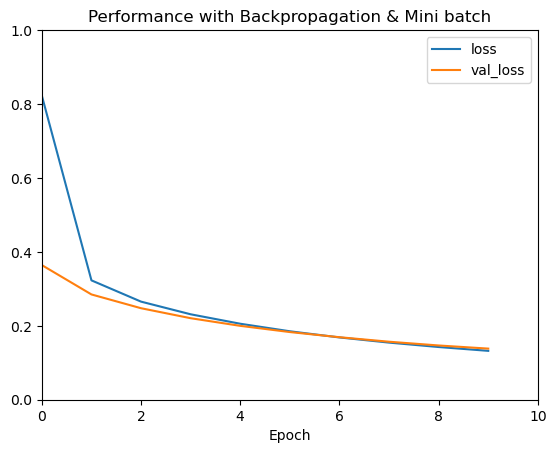

In [124]:
pd.DataFrame(history.history).plot(y=['loss','val_loss'],xlim=[0,10],ylim=[0,1],xlabel='Epoch',title="Performance with Backpropagation & Mini batch")
plt.show()

In [125]:
x = pd.DataFrame(history.history)
x.head(3)

,accuracy,loss,val_accuracy,val_loss
0,0.801783,0.822650,0.8979,0.364247
1,0.908083,0.322944,0.9176,0.284851
2,0.923767,0.265388,0.9268,0.247568
